# Problem 1

### 1.1

In [2]:
#Calculate the entropy H(y) of the binary class variable y. 
#H = -p log(p) - (1-p) log(1-p).
import math

entropy = ( -0.4 * math.log2(0.4) ) - ( (1-0.4) * math.log2(1-0.4) )
print("This is the entropy H(y): ", entropy, "bits.")

This is the entropy H(y):  0.9709505944546686 bits.


### 1.2

In [12]:
#Calculate the information gain
#The information gain for a feature xi is: IG(Y, xi) = H(y) - H(y|xi)

#For x1, H(y|x1) = 
#ent_x1 = ( 0.6 * math.log2(0.6) ) - ( (1 - 0.6) * math.log2(1-0.6))
ent_x1 =( 0.6 * (1/2 * math.log2(2) + 1/2 * math.log2(2)) ) + ( 0.4 * (3/4 * math.log2(4/3) + 1/4 * math.log2(4)))

#For x2, H(y|x2) = 
#ent_x2 = ( 0.5 * math.log2(0.5) ) - ( (1 - 0.5) * math.log2(1-0.5))
ent_x2 = ( 0.5 * (1/5 * math.log2(5) + 4/5 * math.log2(5/4)) ) + ( 0.5 * (1 * math.log2(1) + 0))

#For x3, H(y|x3) = 
#ent_x3 = ( 0.7 * math.log2(0.7) ) - ( (1 - 0.7) * math.log2(1-0.7))
ent_x3 = ( 0.7 * (4/7 * math.log2(7/4) + 3/7 * math.log2(7/3)) ) + ( 0.3 * (2/3 * math.log2(3/2) + 1/3 * math.log2(3)))

#For x4, H(y|x4) = 
#ent_x4 = ( 0.7 * math.log2(0.7) ) - ( (1 - 0.7) * math.log2(1-0.7))
ent_x4 = ( 0.7 * (5/7 * math.log2(7/5) + 2/7 * math.log2(7/2)) ) + ( 0.3 * (1/3 * math.log2(3) + 2/3 * math.log2(3/2)))

#For x5, H(y|x5) = 
#ent_x5 = ( 0.3 * math.log2(0.3) ) - ( (1 - 0.3) * math.log2(1-0.3))
ent_x5 = ( 0.3 * (2/3 * math.log2(3/2) + 1/3 * math.log2(3)) ) + ( 0.7 * (4/7 * math.log2(7/4) + 3/7 * math.log2(7/3)))

IG_x1 = entropy - ent_x1
IG_x2 = entropy - ent_x2
IG_x3 = entropy - ent_x3
IG_x4 = entropy - ent_x4
IG_x5 = entropy - ent_x5

IG_list = [IG_x1, IG_x2, IG_x3, IG_x4, IG_x5]
for i in range(len(IG_list)):
    print("The feature x" + str(i+1) + " has the information gain of: ", IG_list[i])

print("You should split on the feature x2 for the root node of the decision tree because it has the largest information gain.")
#You should split on the feature x2 for the root node of the decision tree because it has the largest information gain. 

The feature x1 has the information gain of:  0.046439344671015514
The feature x2 has the information gain of:  0.6099865470109874
The feature x3 has the information gain of:  0.0058021490143458365
The feature x4 has the information gain of:  0.0912774462416801
The feature x5 has the information gain of:  0.0058021490143458365
You should split on the feature x2 for the root node of the decision tree because it has the largest information gain.


### 1.3

In [11]:
if x2 == 1:
    return -1
else:
    if x4 == 0:
        return +1
    else:
        if x1 == 1:
            return +1
        else:
            return -1

SyntaxError: 'return' outside function (<ipython-input-11-9ec0b5fae2c7>, line 2)

# Problem 2

In [10]:
from __future__ import division

import numpy as np
np.random.seed(0)

import mltools as ml
import sys
sys.path.append('code')

import matplotlib.pyplot as plt   # use matplotlib for plotting with inline plots
plt.set_cmap('jet');
%matplotlib inline
import warnings
warnings.filterwarnings('ignore'); # for deprecated matplotlib functions

### 2.1

In [11]:
X = np.genfromtxt('data/X_train.txt', delimiter = ',')
Y = np.genfromtxt('data/Y_train.txt', delimiter = ',')
X, Y = ml.shuffleData(X,Y)

X = X[:,:41]

for i in range(5):
    print("Data for the feature", str(i+1) + "-> minimum: ", min(X[:,i]), "\tmaximum: ", max(X[:,i]), "\tmean: ", np.mean(X[:,i]), "\tvariance: ", np.var(X[:,i]))



Data for the feature 1-> minimum:  0.0 	maximum:  110285.0 	mean:  1321.1174134446987 	variance:  6747189.595085322
Data for the feature 2-> minimum:  0.0 	maximum:  35.0 	mean:  6.5916745251246125 	variance:  34.70690630279573
Data for the feature 3-> minimum:  0.0 	maximum:  51536.0 	mean:  1152.273237235619 	variance:  5376518.288798102
Data for the feature 4-> minimum:  0.0 	maximum:  21768.0 	mean:  234.8262548834703 	variance:  260120.83053297663
Data for the feature 5-> minimum:  0.0 	maximum:  27210.0 	mean:  289.75871211100633 	variance:  406615.8651128233


### 2.2

In [12]:
Xtr,Xva,Ytr,Yva = ml.splitData(X, Y, 0.5)    #Split data set into 50/50

learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth = 50)

In [13]:
print("training error rate: ", learner.err(Xtr, Ytr))
print("validation error rate: ", learner.err(Xva, Yva))

training error rate:  0.0
validation error rate:  0.40689841013203987


### 2.3

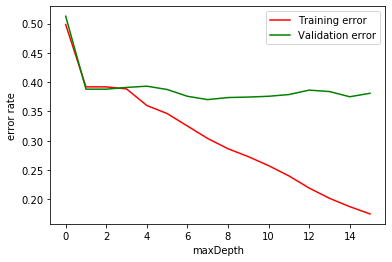

In [18]:
err_tr = np.zeros(16)
err_va = np.zeros(16)

for i in range(16):
    new_learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth = i)
    
    err_tr[i] = new_learner.err(Xtr, Ytr)
    err_va[i] = new_learner.err(Xva, Yva)
    
plt.plot(err_tr, '-r')
plt.plot(err_va, '-g')
plt.xlabel("maxDepth")
plt.ylabel("error rate")
plt.legend(['Training error', 'Validation error'])
plt.show()



2.3 Continued.
Models with higher maxDepth have higer complexity. The maxDepth of 6 provides the best decision tree model. It is neither underfitting nor overfitting. If I choose a value higher than 6, it may be overfittinig because the training error drastically decreases while validation error remains steady. If I choose a value lower than 6, it may be underfitting.

### 2.4

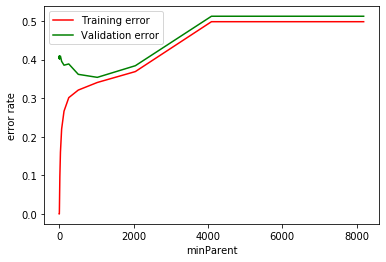

In [19]:
min_prt = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]

err_tr4 = np.zeros(14)
err_va4 = np.zeros(14)

for i in range(0,14):
    learner_4 = ml.dtree.treeClassify(Xtr, Ytr, maxDepth = 50, minParent = 2**i)
    err_tr4[i] = learner_4.err(Xtr, Ytr)
    err_va4[i] = learner_4.err(Xva, Yva)
    
plt.plot(min_prt, err_tr4, '-r')
plt.plot(min_prt, err_va4, '-g')
plt.xlabel("minParent")
plt.ylabel("error rate")

plt.legend(['Training error', 'Validation error'])
plt.show()






2.4 Continued.
Models with higer minParent have lower complexity. The minParent of 2^8 provides the best decision tree model. If I choose a value lower than 2^8, it will be overfitting; training error drastically decreases. If I choose a value larger than 2^8, then it may be underfitting as both training error and validation error are high.

### 2.6

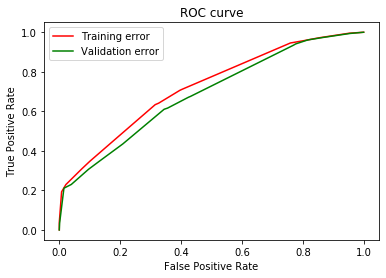

AUC score for training data:  0.7302760762911139
AUC score for validation data:  0.6875349854303666


In [17]:
perfect_learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth = 6, minParent = 2**8)
roc_tr = perfect_learner.roc(Xtr, Ytr)
roc_va = perfect_learner.roc(Xva, Yva)

plt.plot(roc_tr[0], roc_tr[1], '-r')
plt.plot(roc_va[0], roc_va[1], '-g')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title('ROC curve')
plt.legend(['Training error', 'Validation error'])
plt.show()

print("AUC score for training data: ", perfect_learner.auc(Xtr, Ytr))
print("AUC score for validation data: ", perfect_learner.auc(Xva, Yva))

### 2.7

In [5]:
real_learner = ml.dtree.treeClassify(X, Y, maxDepth = 6, minParent = 2 ** 8)
print("AUC score for this data: ", real_learner.auc(X,Y))
print("Accuracy rate for this data : ", 1 - real_learner.err(X,Y))

Xte = np.genfromtxt('data/X_test.txt', delimiter = ',')
Yte = np.vstack((np.arange(Xte.shape[0]), real_learner.predictSoft(Xte)[:,1])).T



AUC score for this data:  0.7279320093117322
Accuracy rate for this data :  0.6562036912299609


In [10]:
np.savetxt('Y_submit.txt', Yte, '%d,%.2f', header = 'Id,Predicted', comments = '', delimiter = ',')

Kaggle Username is: Sanghun Kim. The leaderboard AUC is 0.70525. 

# Problem 3

### 3.1.1 Random Forests

In [21]:
X_all = np.genfromtxt('data/X_train.txt', delimiter = ',')
Y_all = np.genfromtxt('data/Y_train.txt', delimiter = ',')
X_all, Y_all = ml.shuffleData(X_all,Y_all)

Xtr_all,Xva_all,Ytr_all,Yva_all = ml.splitData(X_all, Y_all, 0.5)

m, n = Xtr_all.shape
classifiers = [None] * 25

err_tr3 = np.zeros(25)
err_va3 = np.zeros(25)

for i in range(0, 25):
    Xi, Yi = ml.bootstrapData(Xtr_all, Ytr_all)
    rf_learner = ml.dtree.treeClassify(Xi, Yi, maxDepth = 30, minLeaf = 4, nFeatures = 60)
    classifiers[i] = rf_learner
    
    err_tr3[i] = rf_learner.err(Xtr_all, Ytr_all)
    err_va3[i] = rf_learner.err(Xva_all, Yva_all)

#np.mean(err_tr3)
#np.mean(err_va3)






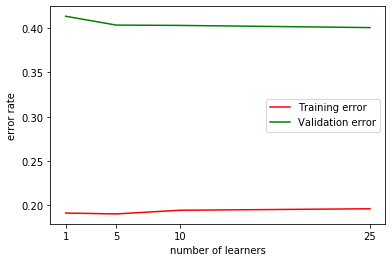

In [24]:
num_learners = [1,5,10,25]

tr_mean = np.zeros(4)
va_mean = np.zeros(4)

for i, v in enumerate([1,5,10,25]):
    #print(i, v)
    tr_mean[i] = np.mean(err_tr3[:v])
    va_mean[i] = np.mean(err_va3[:v])
    
   
    
plt.plot(num_learners, tr_mean, '-r')
plt.plot(num_learners, va_mean, '-g')
plt.xticks(num_learners)
plt.xlabel("number of learners")
plt.ylabel("error rate")

plt.legend(['Training error', 'Validation error'])
plt.show()






### 3.1.2

In [84]:
classifiers2 = [None] * 25
for i in range(0, 25):
    Xi2, Yi2 = ml.bootstrapData(X_all, Y_all)
    rf_learner2 = ml.dtree.treeClassify(Xi2, Yi2, maxDepth = 50, minLeaf = 4, nFeatures = 60, minParent = 2**8)
    classifiers2[i] = rf_learner2

#for i in range(len(classifiers2)):
#    predictions[:,i] = classifiers2[i].predict(Xte)

In [1]:
pred2 = []
for i in range(len(classifiers2)):
    predictions = classifiers2[i].predictSoft(Xte)[:,1]
    pred2.append(predictions)
pred2 = np.asarray(pred2)

#pred2 = np.mean(pred2)
output = np.zeros(7422)
for i in range(0,7422):
    tot = 0
    for x in pred2:
        tot += x[i]
    output[i] = tot/25

NameError: name 'classifiers2' is not defined

In [86]:
#result = np.mean(predictions, axis = 1)
Yte2 = np.vstack((np.arange(Xte.shape[0]), output)).T
np.savetxt('Y_submit2.txt', Yte2, '%d,%.2f', header = 'Id,Predicted', comments = '', delimiter = ',')

Kaggle Username: Sanghun Kim.  AUC score: 0.73899

### 4 Statement of Collaboration

I mostly worked independently. I only discussed with Yulim Chang for some of the problem 1. I read some piazza threads on problem 3 for clarification of instructions like how many features we are allowed to use and whether we should use predict or predictSoft for problem 3.1.2. 